In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
# Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv(r'C:\Users\hayli\Documents\DA12\Projects\un-python-HaylieCannon\data\gdp_percapita.csv')

In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


# 5. How many rows and columns are in `gdp_df`? What are the data types of each column?
# 5 columns and 7,662 rows. 1 object, 1 integer, 2 float

In [6]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df = gdp_df.drop(columns='Value Footnotes')

In [10]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [11]:
gdp_df_rename = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [12]:
gdp_df_rename

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


# 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. 
# What do you notice?

In [14]:
gdp_country_total_years = gdp_df_rename['Year'].nunique()
print(gdp_country_total_years)

33


In [211]:
gdp_country_count = gdp_df_rename.groupby(['Country']).count().sort_values(by = 'Year')
print(gdp_country_count)

                           Year  GDP_Per_Capita
Country                                        
Djibouti                     10              10
Somalia                      10              10
Turks and Caicos Islands     12              12
Sint Maarten (Dutch part)    14              14
Kosovo                       15              15
...                         ...             ...
Jamaica                      33              33
Japan                        33              33
Jordan                       33              33
IDA total                    33              33
Zimbabwe                     33              33

[242 rows x 2 columns]


In [16]:
gdp_country_counts = gdp_country_count.count()
print(gdp_country_counts)

242


In [17]:
gdp_country_count

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64

In [18]:
countries_with_all_years = gdp_country_count[gdp_country_count == gdp_country_total_years]
print(countries_with_all_years)

Country
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
Angola                         33
                               ..
Vanuatu                        33
Viet Nam                       33
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 202, dtype: int64


In [195]:
gdp_country_count[gdp_country_count['Year'] == 33]

,Year,GDP_Per_Capita
Country,,
Papua New Guinea,33,33
Pakistan,33,33
Australia,33,33
Pacific island small states,33,33
Austria,33,33
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [217]:
countries_with_missing_years = gdp_country_count[gdp_country_count['Year'] < 33]
print(countries_with_missing_years)

                           Year  GDP_Per_Capita
Country                                        
Djibouti                     10              10
Somalia                      10              10
Turks and Caicos Islands     12              12
Sint Maarten (Dutch part)    14              14
Kosovo                       15              15
Cayman Islands               16              16
Nauru                        19              19
Afghanistan                  20              20
CuraÃ§ao                     22              22
Palau                        22              22
SÃ£o TomÃ© and Principe      22              22
Qatar                        23              23
Other small states           23              23
Timor-Leste                  23              23
Liberia                      23              23
Libya                        24              24
San Marino                   25              25
Small states                 26              26
Montenegro                   26         

In [20]:
# 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery 
# (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, 
# a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type 
# that you can't necessarily get out of the others?

In [21]:
gdp_df_2020=gdp_df_rename[gdp_df_rename["Year"]==2020]

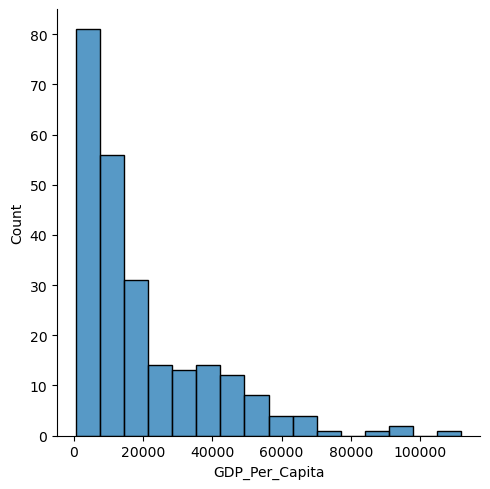

In [219]:
# Histogram
sns.displot(data=gdp_df_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

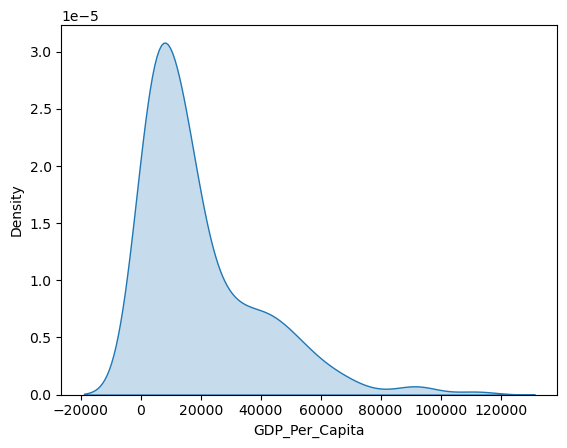

In [221]:
# Density Plot
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'], fill=True)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

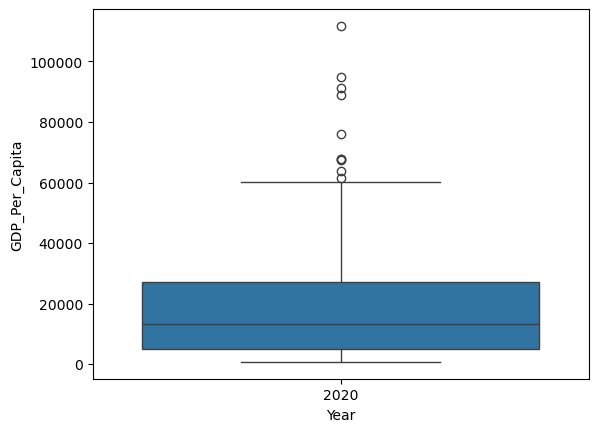

In [225]:
# Boxplot
sns.boxplot(x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

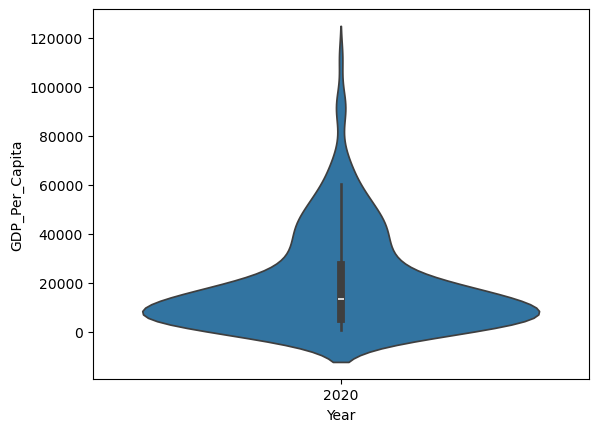

In [25]:
#violin plot
sns.violinplot(x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"])

In [26]:
#the all show very similar things

In [27]:
# 9. What was the median GDP per capita value in 2020?

In [28]:
gdp_df_2020median = gdp_df_2020["GDP_Per_Capita"].median()

In [29]:
gdp_df_2020median

13357.997573370474

In [30]:
# 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. 
# Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
# 	* A boxplot
# 	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
# 	* A scatterplot
# 	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
# Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [31]:
gdp_df_4_years = gdp_df_rename[gdp_df_rename["Year"].isin([1990,2000,2010,2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

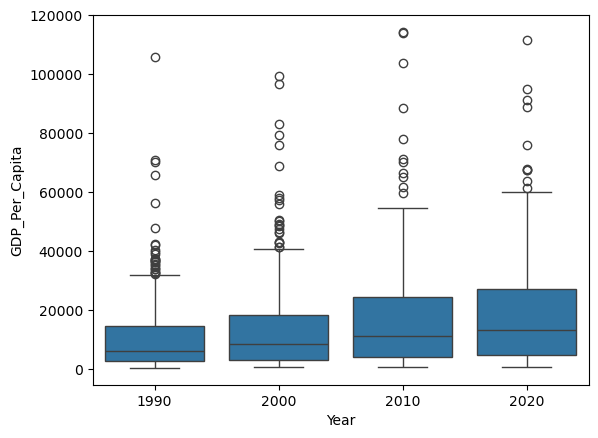

In [32]:
# box plot
sns.boxplot( x=gdp_df_4_years["Year"], y=gdp_df_4_years["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

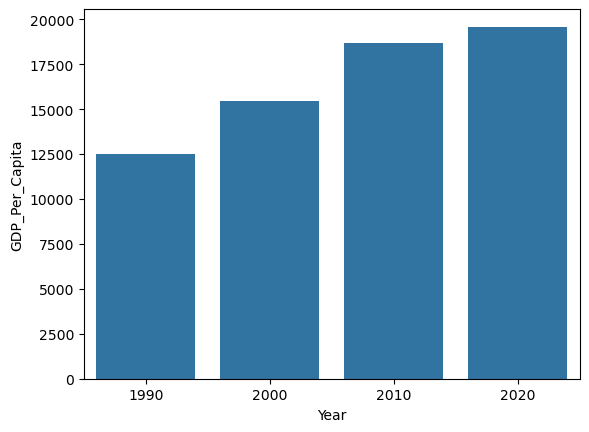

In [33]:
# bar plot
sns.barplot(x="Year", y="GDP_Per_Capita", data=gdp_df_4_years, errorbar=None)

Text(0, 0.5, 'GDP_Per_Capita')

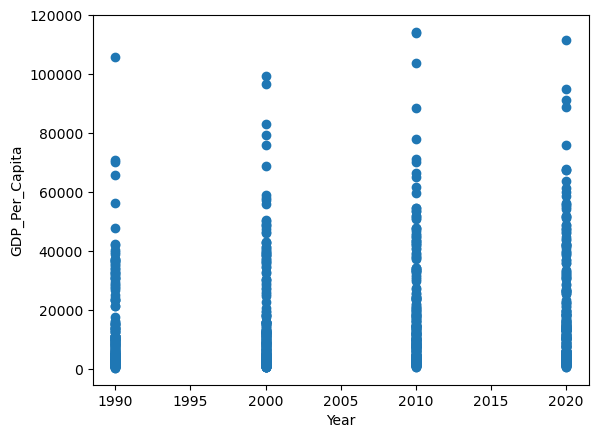

In [34]:
# Scatter plot
plt.scatter(gdp_df_4_years.Year, gdp_df_4_years.GDP_Per_Capita)
plt.xlabel("Year")
plt.ylabel("GDP_Per_Capita")

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

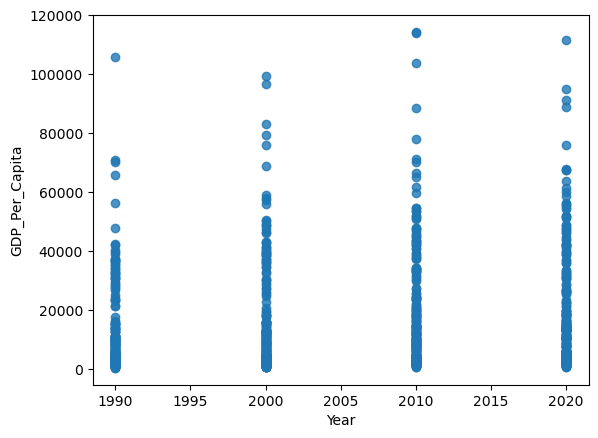

In [35]:
sns.regplot(x=gdp_df_4_years["Year"], y=gdp_df_4_years["GDP_Per_Capita"], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

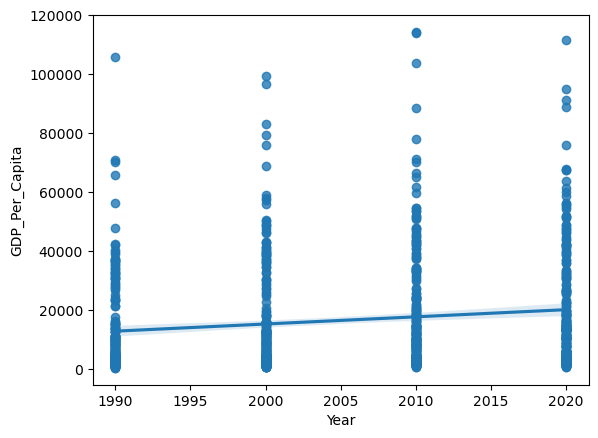

In [36]:
# scatter plot with trendline
sns.regplot(x=gdp_df_4_years["Year"], y=gdp_df_4_years["GDP_Per_Capita"])

In [229]:
# 11. Which country was the first to have a GDP per capita greater than $100,000?

In [38]:
gdp_df_100000 = gdp_df_rename[gdp_df_rename["GDP_Per_Capita"] > 100000]

In [247]:
sorted_gdp_df_100000 = gdp_df_100000.sort_values(["Year"]).reset_index()

In [253]:
sorted_gdp_df_100000.head()

,index,Country,Year,GDP_Per_Capita
0,7302,United Arab Emirates,1990,105893.626059
1,7301,United Arab Emirates,1991,101048.696239
2,7295,United Arab Emirates,1997,100956.706467
3,4167,Luxembourg,2001,101143.147977
4,4166,Luxembourg,2002,103317.331098


In [249]:
sorted_gdp_df_100000.loc[0]

index                             7302
Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 0, dtype: object

In [42]:
# 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan 
# of the dataset.

In [267]:
gdp_df_2020_max=gdp_df_2020['GDP_Per_Capita'].max()

In [269]:
gdp_df_2020_max

111751.3147513618

In [271]:
gdp_df_2020[gdp_df_2020['GDP_Per_Capita'] == gdp_df_2020_max]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [275]:
gdp_df_Luxembourg=gdp_df_rename[gdp_df_rename["Country"]=="Luxembourg"]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

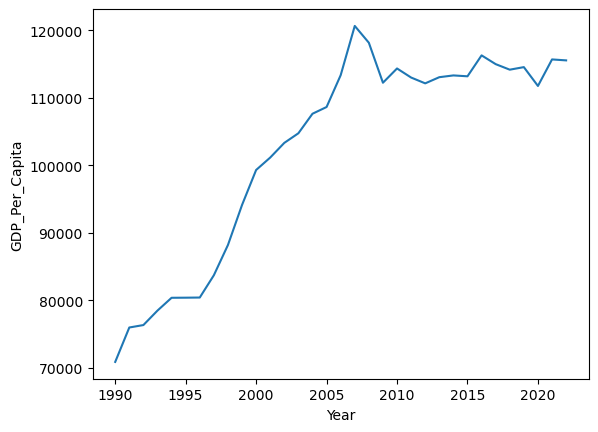

In [333]:
sns.lineplot(data=gdp_df_Luxembourg, x="Year", y="GDP_Per_Capita")

In [46]:
# 13. Which country had the lowest GDP per capita in 2020? 
# Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [313]:
gdp_df_2020_min=gdp_df_2020['GDP_Per_Capita'].min()
gdp_df_2020_min

711.355263423169

In [315]:
gdp_df_2020[gdp_df_2020['GDP_Per_Capita'] == gdp_df_2020_min]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [317]:
gdp_df_Burundi=gdp_df_rename[gdp_df_rename["Country"]=="Burundi"]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

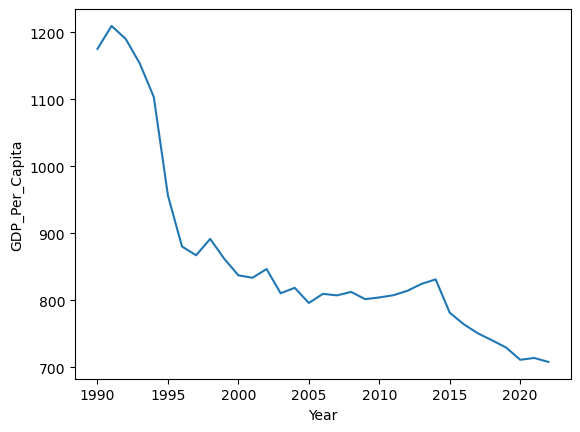

In [331]:
sns.lineplot(data=gdp_df_Burundi, x="Year", y="GDP_Per_Capita", )

In [50]:
# **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita 
# in 2020 than in 1990?

In [299]:
gdp_comparison = pd.merge(
    left = gdp_df_rename[gdp_df_rename['Year'] == 1990],
    right = gdp_df_rename[gdp_df_rename['Year'] == 2020],
    on = 'Country',
    suffixes = ['_1990', '_2020']
)

In [307]:
gdp_comparison['2020_lower'] = gdp_comparison['GDP_Per_Capita_2020'] < gdp_comparison['GDP_Per_Capita_1990']
gdp_comparison

,Country,Year_1990,GDP_Per_Capita_1990,Year_2020,GDP_Per_Capita_2020,2020_lower
0,Africa Eastern and Southern,1990,3037.297466,2020,3455.023119,False
1,Africa Western and Central,1990,2788.301039,2020,3957.933804,False
2,Albania,1990,4827.027705,2020,13278.369769,False
3,Algeria,1990,8828.874473,2020,10844.770764,False
4,Angola,1990,5793.084512,2020,6029.691895,False
...,...,...,...,...,...,...
202,Vanuatu,1990,2774.138350,2020,2848.970240,False
203,Viet Nam,1990,2099.394649,2020,10450.622382,False
204,World,1990,9705.981267,2020,16204.169107,False
205,Zambia,1990,2290.039226,2020,3183.650773,False


In [311]:
gdp_comparison['2020_lower'].value_counts()

2020_lower
False    188
True      19
Name: count, dtype: int64

In [52]:
# 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the 
# read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) 
# Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. 
# Also, check the datatypes of the columns.

In [53]:
internet_df = pd.read_csv(r'C:\Users\hayli\Documents\DA12\Projects\un-python-HaylieCannon\data\internet_use.csv', nrows=6083)

In [54]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [55]:
# 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [56]:
internet_df_drop = internet_df.drop(columns='Value Footnotes')

In [57]:
internet_df_drop

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [58]:
internet_df_rename = internet_df_drop.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [59]:
internet_df_rename

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [60]:
# 16. Look at the number of observations in this dataset per year. What do you notice?

In [61]:
internet_df_count = internet_df_rename.value_counts("Year")
print(internet_df_count)

Year
1990    226
2007    217
2008    214
2011    214
2009    214
2002    214
2001    212
2005    212
2006    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2013    203
2015    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64


In [62]:
internet_df_count_sorted = internet_df_count.sort_values(ascending=False)

In [63]:
# Answer: The number of dataset per year

In [64]:
# 17. What is the first year to have a non-zero internet users percentage value?

In [65]:
internet_df_rename_nonzero = internet_df_rename[internet_df_rename["Internet_Users_Pct"] > 0]
print(internet_df_rename_nonzero)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2019           17.600000
1     Afghanistan  2018           16.800000
2     Afghanistan  2017           13.500000
3     Afghanistan  2016           11.000000
4     Afghanistan  2015            8.260000
...           ...   ...                 ...
6077     Zimbabwe  1998            0.081648
6078     Zimbabwe  1997            0.033080
6079     Zimbabwe  1996            0.016790
6080     Zimbabwe  1995            0.007684
6081     Zimbabwe  1994            0.001739

[5803 rows x 3 columns]


In [66]:
internet_df_rename_nonzero_sorted = internet_df_rename_nonzero["Year"].sort_values()
print(internet_df_rename_nonzero_sorted)

1570    1990
2892    1990
306     1990
2034    1990
339     1990
        ... 
427     2023
677     2023
1656    2023
1537    2023
3057    2023
Name: Year, Length: 5803, dtype: int64


In [67]:
internet_df_rename_nonzero_min = internet_df_rename_nonzero["Year"].min()
print(internet_df_rename_nonzero_min)

1990


In [68]:
# Answer: The first year with a non zero internet users percentage value is 1990.

In [69]:
# 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [70]:
internet_df_2000vs2014 = internet_df_rename[internet_df_rename["Year"].isin([2000, 2014])]
print(internet_df_2000vs2014)

          Country  Year  Internet_Users_Pct
5     Afghanistan  2014            7.000000
28        Albania  2014           54.300000
42        Albania  2000            0.114097
57        Algeria  2014           29.500000
71        Algeria  2000            0.491706
...           ...   ...                 ...
6017        Yemen  2000            0.082500
6031       Zambia  2014            6.500000
6045       Zambia  2000            0.191072
6061     Zimbabwe  2014           16.364700
6075     Zimbabwe  2000            0.401434

[414 rows x 3 columns]


In [71]:
internet_df_2000 = internet_df_rename[internet_df_rename["Year"]== 2000]

In [72]:
internet_df_2014 = internet_df_rename[internet_df_rename["Year"]== 2014]

<Axes: xlabel='Internet_Users_Pct', ylabel='Count'>

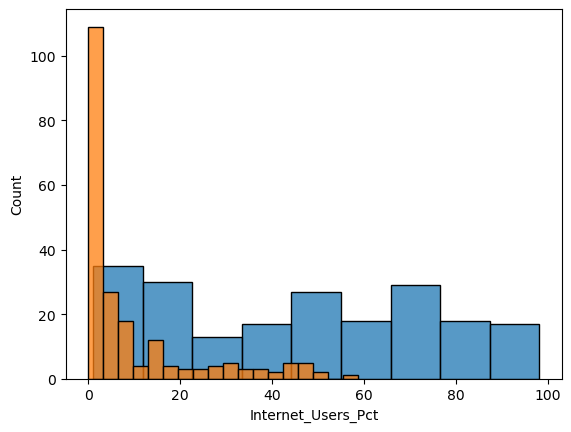

In [73]:
sns.histplot(data=internet_df_2014, x="Internet_Users_Pct")
sns.histplot(data=internet_df_2000, x="Internet_Users_Pct")

In [74]:
# Answer: 2020 has a lot more countries with lower users user percentages. 2014 has a pretty even distribution

In [75]:
# 19. For how many countries was the percentage of internet users below 5% in 2014?

In [76]:
internet_df_2014_below_5pct = internet_df_2014[internet_df_2014["Internet_Users_Pct"]<5].count()
print(internet_df_2014_below_5pct)

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64


In [77]:
# Answer: there are 10 countries with a percentage of internet users below 5% in 2014

In [78]:
# 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. 
# Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [79]:
gdp_and_internet_use = pd.merge(gdp_df_rename, internet_df_rename, on=["Country","Year"])
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2079.921861,17.60
1,Afghanistan,2018,2060.698973,16.80
2,Afghanistan,2017,2096.093111,13.50
3,Afghanistan,2016,2101.422187,11.00
4,Afghanistan,2015,2108.714173,8.26


In [80]:
# 21. Find the three countries with the highest internet users percentage in 2014. 
# Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for 
# these three countries. What do you notice?

In [81]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014]

In [82]:
gdp_and_internet_use_2014.sort_values(by= "GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2478,Luxembourg,2014,113313.578898,94.67020
3489,Qatar,2014,106141.326189,91.49000
3750,Singapore,2014,87702.521984,79.02920
511,Bermuda,2014,77361.104881,96.80000
853,Cayman Islands,2014,67762.360120,74.10000
...,...,...,...,...
2928,Mozambique,2014,1228.656835,6.00000
3073,Niger,2014,1119.137212,1.24868
3838,Somalia,2014,925.577067,1.63000
713,Burundi,2014,831.294839,1.04239


In [83]:
# Top 3 countries in 2014 are Luxembourg, Qatar and Singapore

In [84]:
gdp_and_internet_use_top3 = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Luxembourg", "Qatar", "Singapore"])]

In [85]:
# gdp_and_internet_use_facetgrid = sns.FacetGrid(gdp_and_internet_use_top3, col="GDP_Per_Capita", row="Year")

In [86]:
# gdp_and_internet_use_facetgrid.map(sns.linepot, "Year", "GDP_Per_Capita")
plt.show()

In [87]:
# 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`

In [88]:
gdp_and_internet_use_2014=gdp_and_internet_use[gdp_and_internet_use["Year"]==2014]

In [89]:
# 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? 
# If you see any unusual points, investigate them.

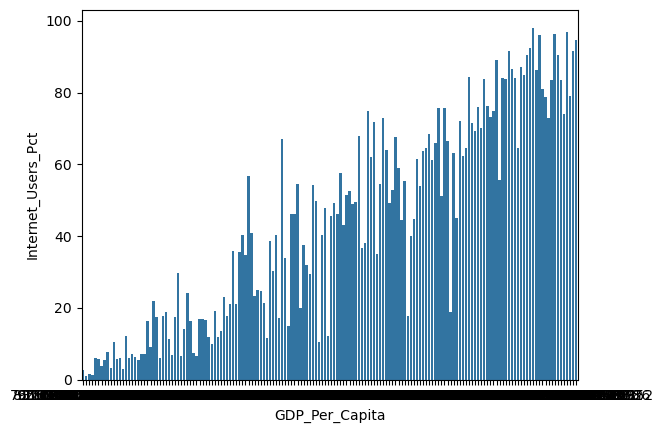

In [90]:
sns.barplot(x="GDP_Per_Capita", y="Internet_Users_Pct", data=gdp_and_internet_use_2014)
plt.show()

In [91]:
# 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries 
# in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". 
# Put these labels in a new column, named "GDP_group".

In [92]:
gdp_and_internet_use_2014_qcut = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], 3, labels=["Low", "Medium", "High"], retbins=False, precision=3, duplicates='raise')
print(gdp_and_internet_use_2014_qcut)

5          Low
26      Medium
55      Medium
85      Medium
113     Medium
         ...  
4496       Low
4525       Low
4553    Medium
4581       Low
4611       Low
Name: GDP_Per_Capita, Length: 162, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [93]:
# 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [94]:
### Bonus exercise:
# 1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.